In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import string
import itertools as it

In [2]:
# paramters, change these to adjust the sample
C = 4
N = 200
offset = 2
spacing = 2
D=2


# ------- Get the class labels
# choose the first C uppcase letters using the builtin string class
classes = list(string.ascii_uppercase[:C])


# ------- Pick some means
# get the number of grid locations needed
G = int(np.ceil(np.sqrt(C)))


# get the locations for each axis
grid_locs = a = np.linspace(offset,offset+G*spacing,G)


# compute grid (i,j) for each combination of values above & keep C values
means = [(i,j) for i, j in it.product(grid_locs,grid_locs)][:C]


# store in dictionary with class labels
mu = {c: i for c, i in zip(classes,means)}


# ------- Pick the variances
# random variances
sigma = {c: i*.5 for c, i in zip(classes,np.random.random(D))}


# ------- Sample the data
#randomly choose a class for each point, with equal probability
clusters_true = np.random.choice(classes,N)
# draw a random point according to the means from above for each point
data = [np.random.multivariate_normal(mu[c],.25*np.eye(D)) for c in clusters_true]


# ------- Store in a dataframe
# rounding to make display neater later
df = pd.DataFrame(data = data,columns = ['x' + str(i) for i in range(D)]).round(2)


# add true cluster
df['true_cluster'] = clusters_true

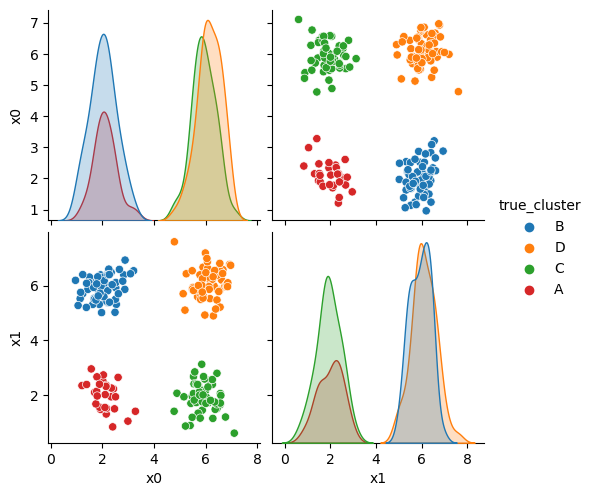

In [3]:
sns.pairplot(data = df,hue = 'true_cluster')

In [4]:
data_cols = ['x0','x1']

In [5]:
K = 4

In [6]:
mu = df[data_cols].sample(n=K).values
mu

array([[5.98, 2.13],
       [6.28, 1.15],
       [2.49, 5.03],
       [1.82, 6.33]])

In [7]:
i = 0

In [8]:
def mu_to_df(mu,i):
    mu_df = pd.DataFrame(mu,columns=['x0','x1'])
    mu_df['iteration'] = str(i)
    mu_df['class'] = ['M'+str(i) for i in range(K)]
    mu_df['type'] = 'mu'
    return mu_df

cmap_pt = sns.color_palette('tab20',8)[1::2]
cmap_mu = sns.color_palette('tab20',8)[0::2]

In [9]:
[((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu]

[0      34.7780
 1      13.9885
 2      22.5250
 3      11.5961
 4      34.2992
         ...   
 195    36.7497
 196     0.0610
 197     0.0208
 198    16.8010
 199    12.0770
 Length: 200, dtype: float64,
 0      46.5172
 1      22.3873
 2      32.1194
 3      19.1965
 4      45.8120
         ...   
 195    48.3157
 196     0.9826
 197     0.8840
 198    20.8346
 199    14.8370
 Length: 200, dtype: float64,
 0       2.0873
 1      12.6772
 2      22.7761
 3      13.7924
 4       1.8621
         ...   
 195     2.3336
 196    19.9393
 197    20.7485
 198     7.2769
 199     9.5485
 Length: 200, dtype: float64,
 0       0.0004
 1      17.2685
 2      26.3146
 3      19.5625
 4       0.0320
         ...   
 195     0.2425
 196    34.3514
 197    35.3088
 198    15.4498
 199    19.7482
 Length: 200, dtype: float64]

In [10]:
pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)

0      3
1      2
2      0
3      0
4      3
      ..
195    3
196    0
197    0
198    2
199    2
Length: 200, dtype: int64

<Axes: xlabel='x0', ylabel='x1'>

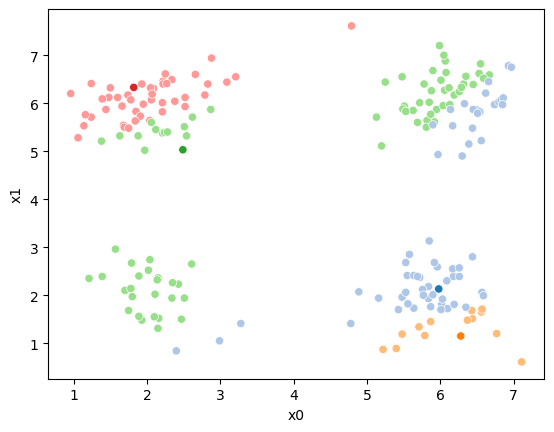

In [11]:
df[str(i)] = pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)




sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='0',palette=cmap_pt,legend=False)
# plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)
mu_df = mu_to_df(mu,i)
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
# sfig.get_figure().savefig('kmeans01.png')


<Axes: xlabel='x0', ylabel='x1'>

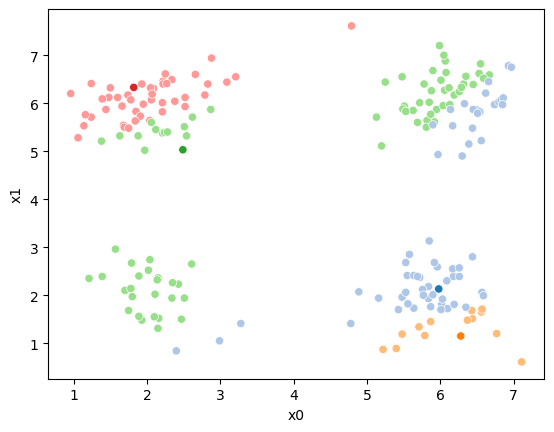

In [12]:
df[str(i)] = pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)




sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='0',palette=cmap_pt,legend=False)
# plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)
mu_df = mu_to_df(mu,i)
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
# sfig.get_figure().savefig('kmeans01.png')

<Axes: xlabel='x0', ylabel='x1'>

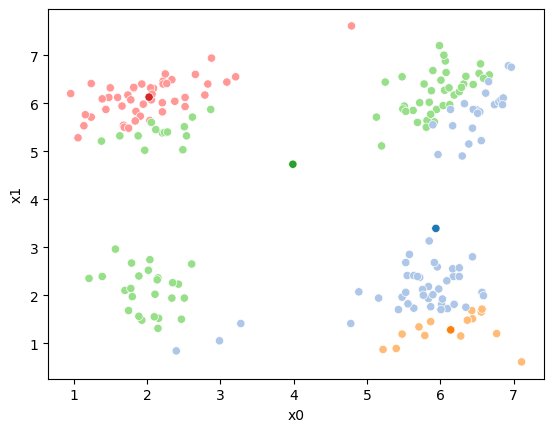

In [13]:
mu = df.groupby('0')[data_cols].mean().values


fig = plt.figure()
mu_df = mu_to_df(mu,i)
sfig = sns.scatterplot(data =df,x='x0',y='x1',hue='0',palette=cmap_pt,legend=False)
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)


<Axes: xlabel='x0', ylabel='x1'>

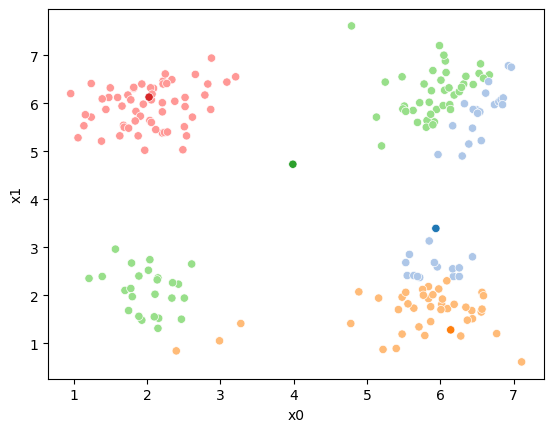

In [14]:
i = 1
df[str(i)] = pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)




sfig = sns.scatterplot(data =df,x='x0',y='x1',hue=str(i),palette=cmap_pt,legend=False)
# plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)
mu_df = mu_to_df(mu,i)
sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
# sfig.get_figure().savefig('kmeans01.png')


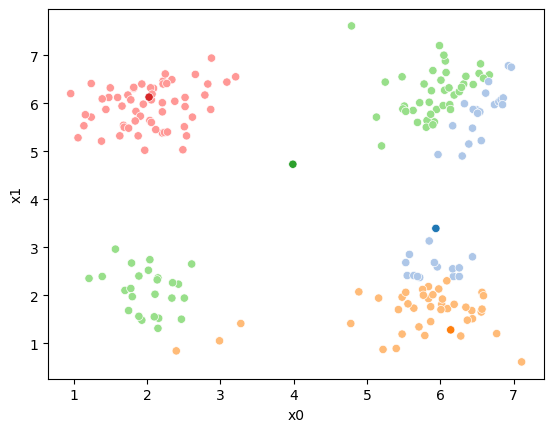

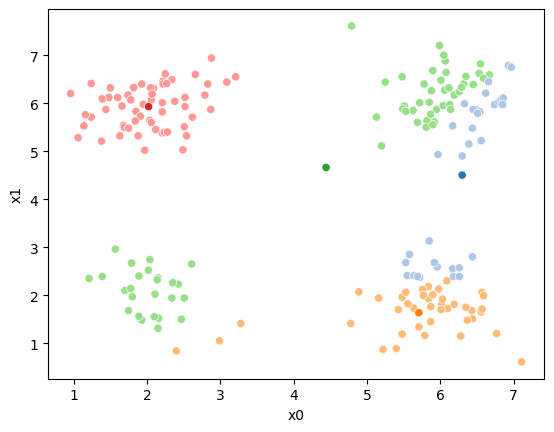

In [15]:
mu_list = [mu_to_df(mu,i)]
cur_old = str(i-1)
cur_new = str(i)
while sum(df[cur_old] !=df[cur_new]) >0:
    cur_old = cur_new
    i +=1
    cur_new = str(i)
    #     update the assigments and plot with the associated means
    df[cur_new] = pd.concat([((df[data_cols]-mu_i)**2).sum(axis=1) for mu_i in mu],axis=1).idxmin(axis=1)
    fig = plt.figure()
    sfig = sns.scatterplot(data =df,x='x0',y='x1',hue=cur_new,palette=cmap_pt,legend=False)
    sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
    file_num = str(i*2 -1).zfill(2)
    sfig.get_figure().savefig('kmeans' +file_num + '.png')




    #     update the means and plot with current generating assignments
    mu = df.groupby(cur_new)[data_cols].mean().values
    mu_df = mu_to_df(mu,i)
    mu_list.append(mu_df)


    fig = plt.figure()
    sfig = sns.scatterplot(data =df,x='x0',y='x1',hue=cur_new,palette=cmap_pt,legend=False)
    sns.scatterplot(data =mu_df,x='x0',y='x1',hue='class',palette=cmap_mu,ax=sfig,legend=False)
#     plt.plot(mu[:,0],mu[:,1],marker='s',linewidth=0)


    file_num = str(i*2).zfill(2)
    sfig.get_figure().savefig('kmeans' +file_num + '.png')


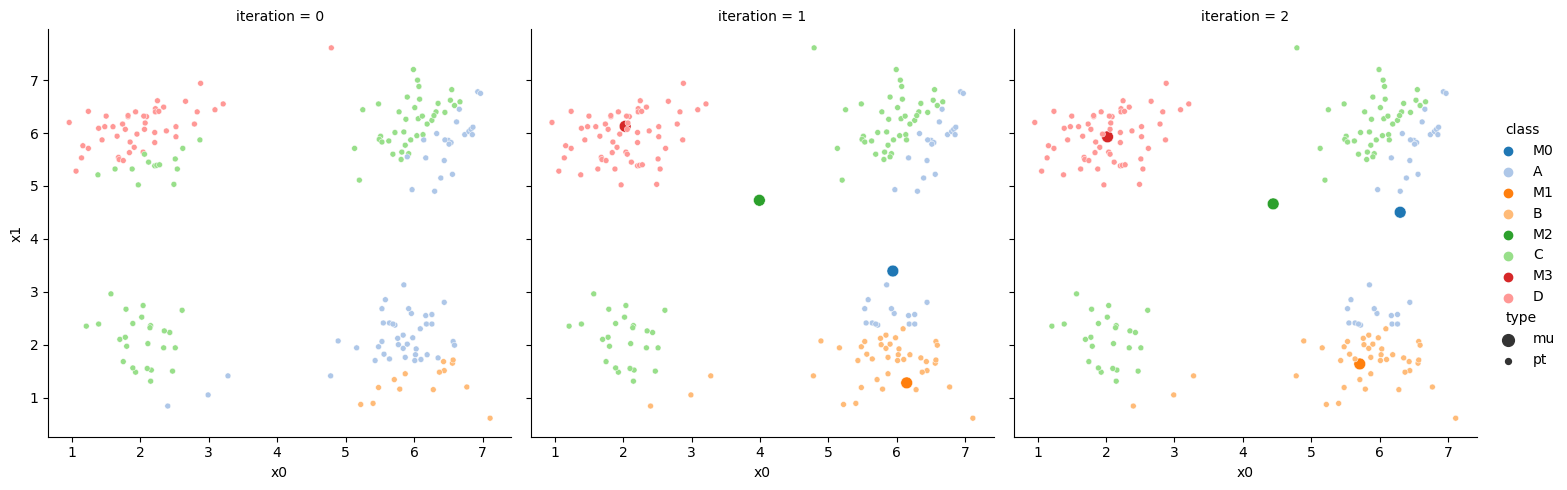

In [16]:
df_vis = df.melt(id_vars = ['x0','x1'], var_name ='iteration',value_name='class')
df_vis.replace({'class':{i:c for i,c in enumerate(string.ascii_uppercase[:C])}},inplace=True)

df_vis['type'] = 'pt'
df_mu_vis = pd.concat([pd.concat(mu_list),df_vis])
cmap = sns.color_palette('tab20',8)
n_iter = i

sns.relplot(data=df_mu_vis,x='x0',y='x1',hue='class',col='iteration',
            col_wrap=3,hue_order = ['M0','A','M1','B','M2','C','M3','D'],
           palette = cmap,size='type',col_order=[str(i) for i in range(n_iter+1)])

In [17]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(df[data_cols])

C:\Users\slowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\slowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
kmeans.labels_

array([2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0,
       0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 3, 2, 0, 2, 0, 0, 2, 1, 3, 2, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 3, 2, 3, 2, 0, 0, 1, 0,
       3, 2, 2, 2, 0, 0, 1, 3, 0, 0, 3, 1, 3, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 3, 3, 2, 0, 0, 2, 0, 1, 2, 3, 2, 2, 0, 1, 0, 0, 1,
       2, 1, 1, 0, 1, 2, 3, 0, 1, 1, 3, 2, 3, 0, 2, 2, 2, 1, 3, 3, 1, 1,
       1, 2, 3, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 3, 0, 0, 2, 1, 2, 2, 3, 3,
       2, 1, 1, 0, 3, 2, 1, 3, 0, 0, 0, 2, 3, 0, 1, 2, 1, 1, 0, 2, 1, 1,
       3, 3])

In [19]:
kmeans.cluster_centers_

array([[6.13786885, 6.09721311],
       [5.92557692, 1.92269231],
       [2.02271186, 5.92830508],
       [2.10535714, 1.995     ]])

In [20]:
df.groupby('true_cluster')[data_cols].mean()

,x0,x1
true_cluster,,
A,2.105357,1.995000
B,2.022712,5.928305
C,5.925577,1.922692
D,6.137869,6.097213
